In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/Nhorsey/MANE-4962_Project/main/Dataset/ai4i2020.csv")

print(df.keys())



num_fails = len(df.loc[df['Machine failure'] == 1])
num_passes = len(df.loc[df['Machine failure'] == 0])
total = df.size
print(num_fails, num_passes, total)

num_random_fails = len(df.loc[df['RNF'] == 1])
print(num_random_fails)

# make a new "slim" dataframe where 90% of the non-failure cases have been
# removed for better visualization (to reduce clutter).
#df_slim = df.drop(df.loc[df['Machine failure'] == 0].sample(frac=0.95).index)
#df_slim = df_slim.drop(df_slim.loc[df_slim['Machine failure'] == 1].sample(frac=0.70).index)
#fig = plt.figure(figsize = (7, 7))
#ax = plt.axes(projection ="3d")
# Creating plot
#ax.scatter3D(samples['Air temperature [K]'], samples['Process temperature [K]'], samples['Torque [Nm]'], c=samples['Machine failure'])

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')
339 9661 140000
19


In [ ]:
print(len(df.index))

10000


In [ ]:
FailureModes = {
    1: 'TWF',
    2: 'HDF',
    3: 'PWF',
    4: 'OSF',
    5: 'RNF'
}



num_fail = len(df.loc[df['Machine failure'] == 1])
fail_samples = df.loc[df['Machine failure'] == 1].sample(n=1000, replace=True)
pass_samples = df.loc[df['Machine failure'] == 0].sample(n=1000, replace=True)
samples = pd.concat([pass_samples, fail_samples])

num_TWF = len(df.loc[df['TWF'] == 1])
TWF_fail_samples = df.loc[df['TWF'] == 1].sample(n=100, replace=True)
TWF_pass_samples = df.loc[df['TWF'] == 0].sample(n=100, replace=True)
TWF_samples = pd.concat([TWF_fail_samples, TWF_pass_samples])

num_HDF = len(df.loc[df['HDF'] == 1])
HDF_fail_samples = df.loc[df['HDF'] == 1].sample(n=100, replace=True)
HDF_pass_samples = df.loc[df['HDF'] == 0].sample(n=100, replace=True)
HDF_samples = pd.concat([HDF_fail_samples, HDF_pass_samples])

num_PWF = len(df.loc[df['PWF'] == 1])
PWF_fail_samples = df.loc[df['PWF'] == 1].sample(n=100, replace=True)
PWF_pass_samples = df.loc[df['PWF'] == 0].sample(n=100, replace=True)
PWF_samples = pd.concat([PWF_fail_samples, PWF_pass_samples])

num_OSF = len(df.loc[df['OSF'] == 1])
OSF_fail_samples = df.loc[df['OSF'] == 1].sample(n=100, replace=True)
OSF_pass_samples = df.loc[df['OSF'] == 0].sample(n=100, replace=True)
OSF_samples = pd.concat([OSF_fail_samples, OSF_pass_samples])

num_RNF = len(df.loc[df['RNF'] == 1])
RNF_fail_samples = df.loc[df['RNF'] == 1].sample(n=100, replace=True)
RNF_pass_samples = df.loc[df['RNF'] == 0].sample(n=100, replace=True)
RNF_samples = pd.concat([RNF_fail_samples, RNF_pass_samples])

print(num_RNF)
print(num_fail)



19
339


[9661, 339, 46, 115, 95, 98, 19]


Text(0.5, 1.0, 'Failure Statistics')

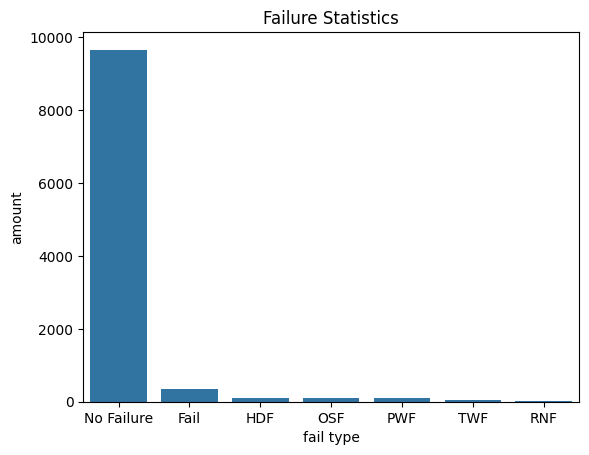

In [ ]:
fail_nums = [num_passes, num_fail, num_TWF, num_HDF,num_PWF, num_OSF, num_RNF]
print(fail_nums)
fail_names = ['No Failure','Fail','TWF', 'HDF', 'PWF', 'OSF', 'RNF']
fail_data = list(zip(fail_names, fail_nums))
failstat_df = pd.DataFrame(fail_data,columns=['fail type','amount'])
failstat_df = failstat_df.sort_values(['amount'], ascending=False).reset_index(drop=True)
sns.barplot(x='fail type', y ='amount', data=failstat_df)
plt.title('Failure Statistics')

In [ ]:
vars = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]']
plot_kws = {'alpha':0.15, 'edgecolor': None}
corner = True
params = [vars, plot_kws, corner]

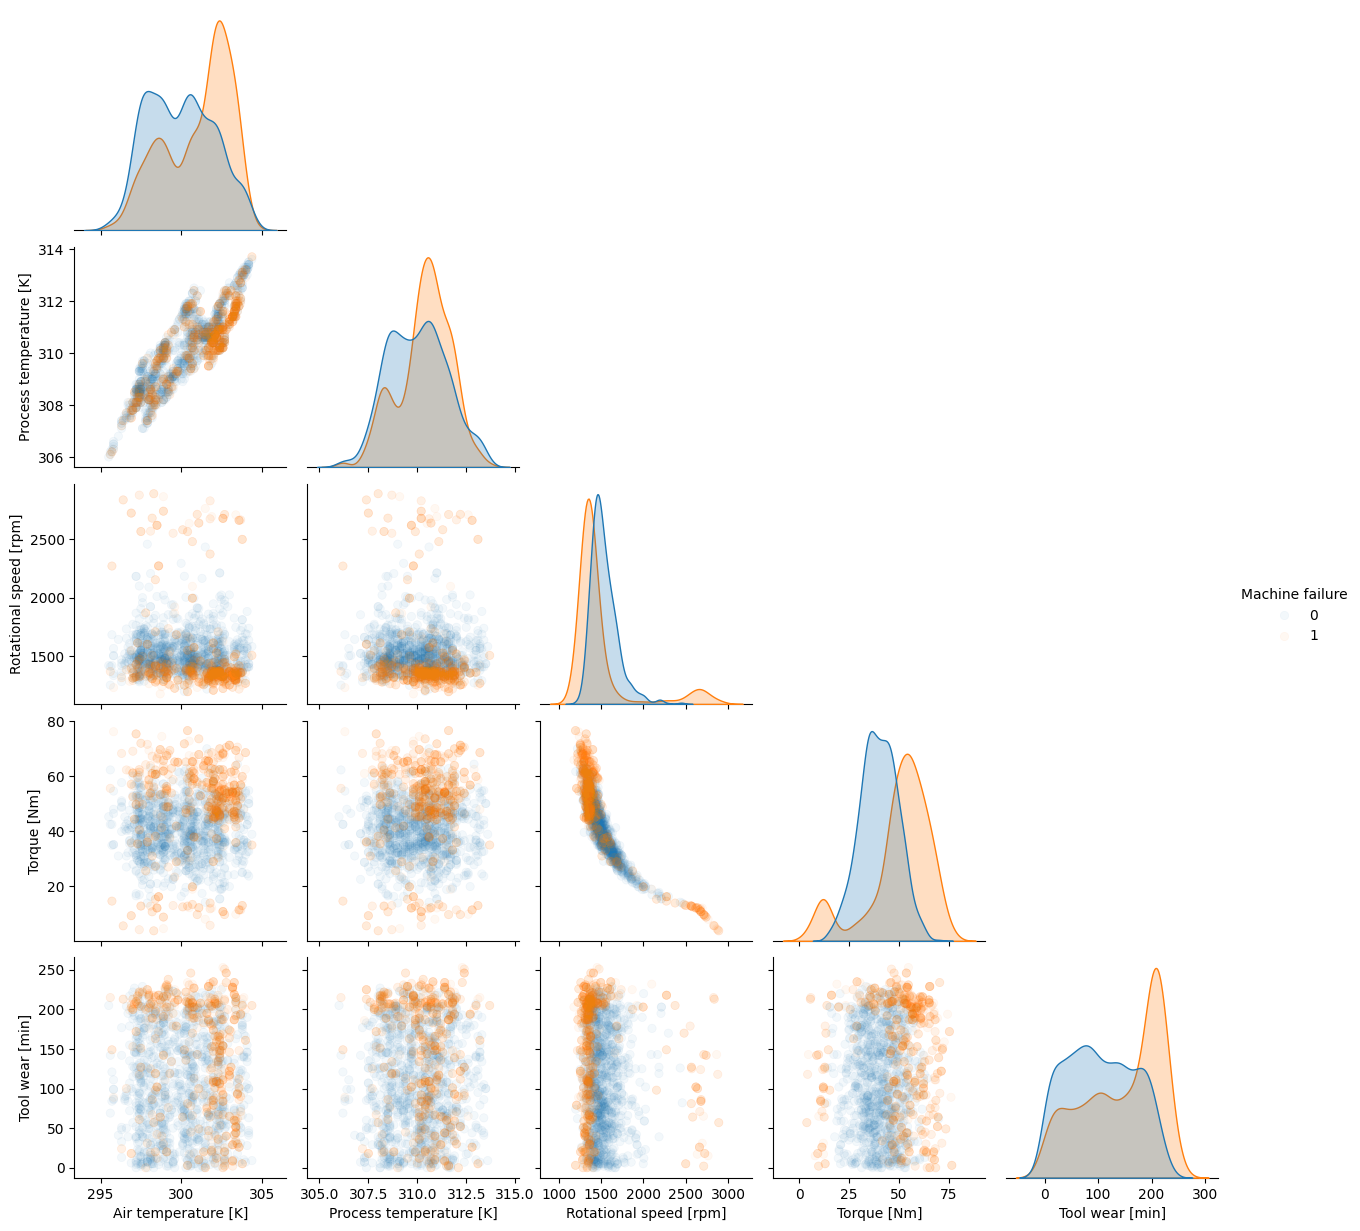

In [ ]:
sns.pairplot(
    samples,
    hue='Machine failure',
    vars=[
        'Air temperature [K]',
        'Process temperature [K]',
        'Rotational speed [rpm]',
        'Torque [Nm]',
        'Tool wear [min]'],
    plot_kws={'alpha':0.05, 'edgecolor': None},
    corner=True)

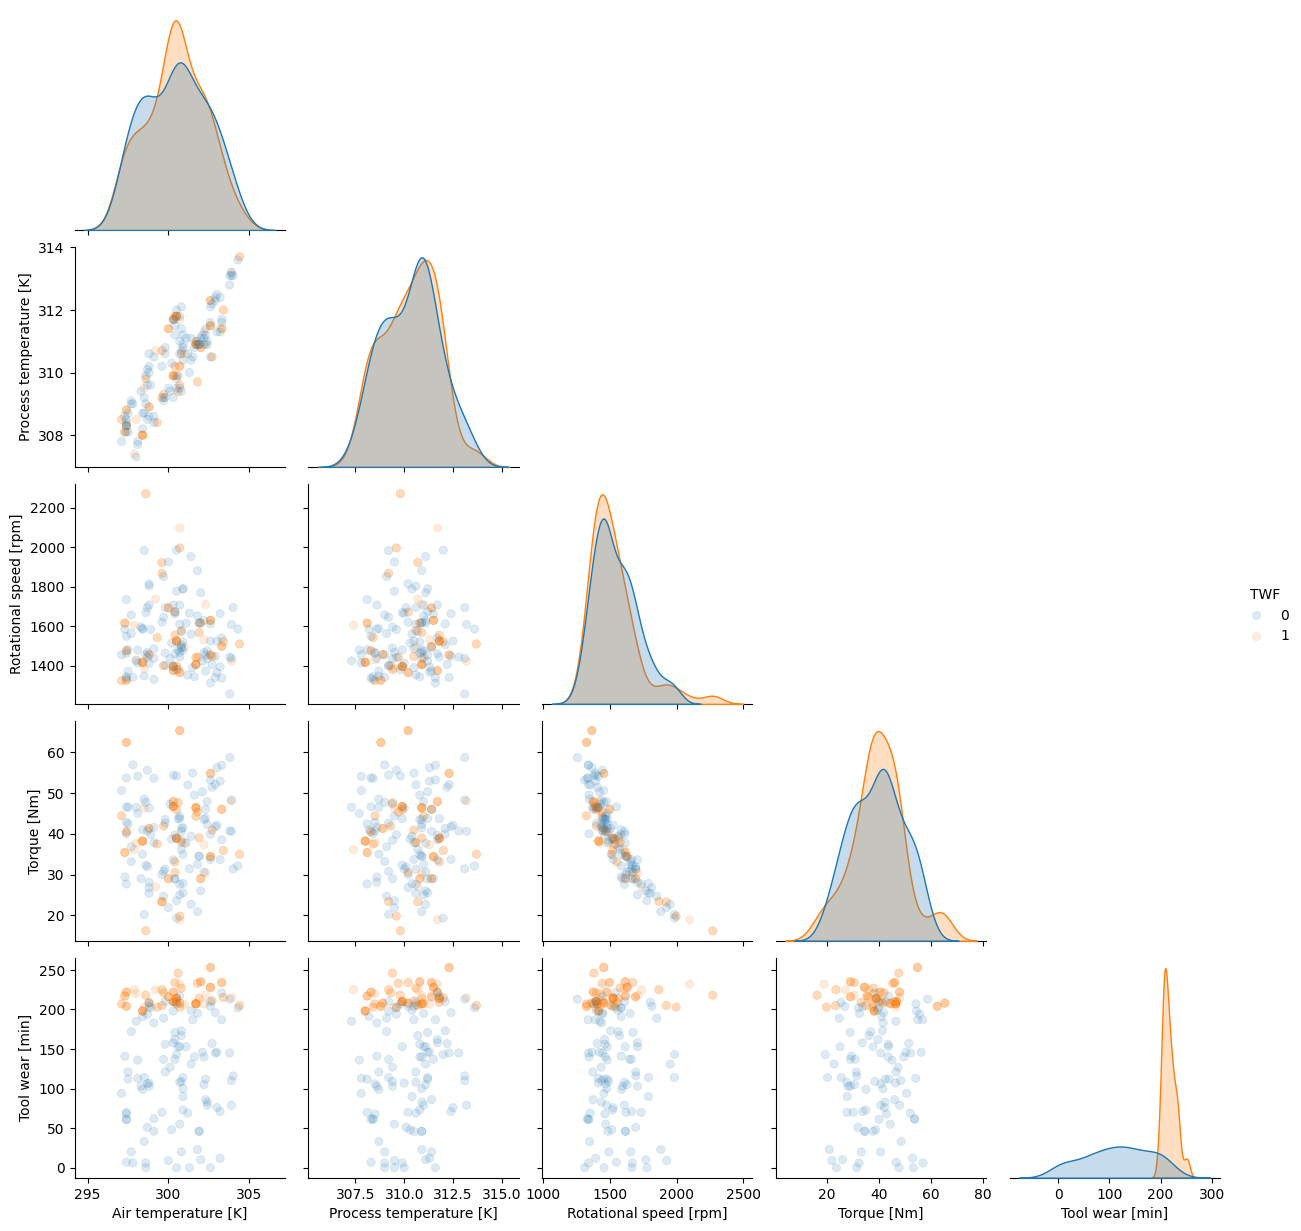

In [ ]:
sns.pairplot(TWF_samples,hue='TWF', vars=vars, plot_kws=plot_kws, corner=True)

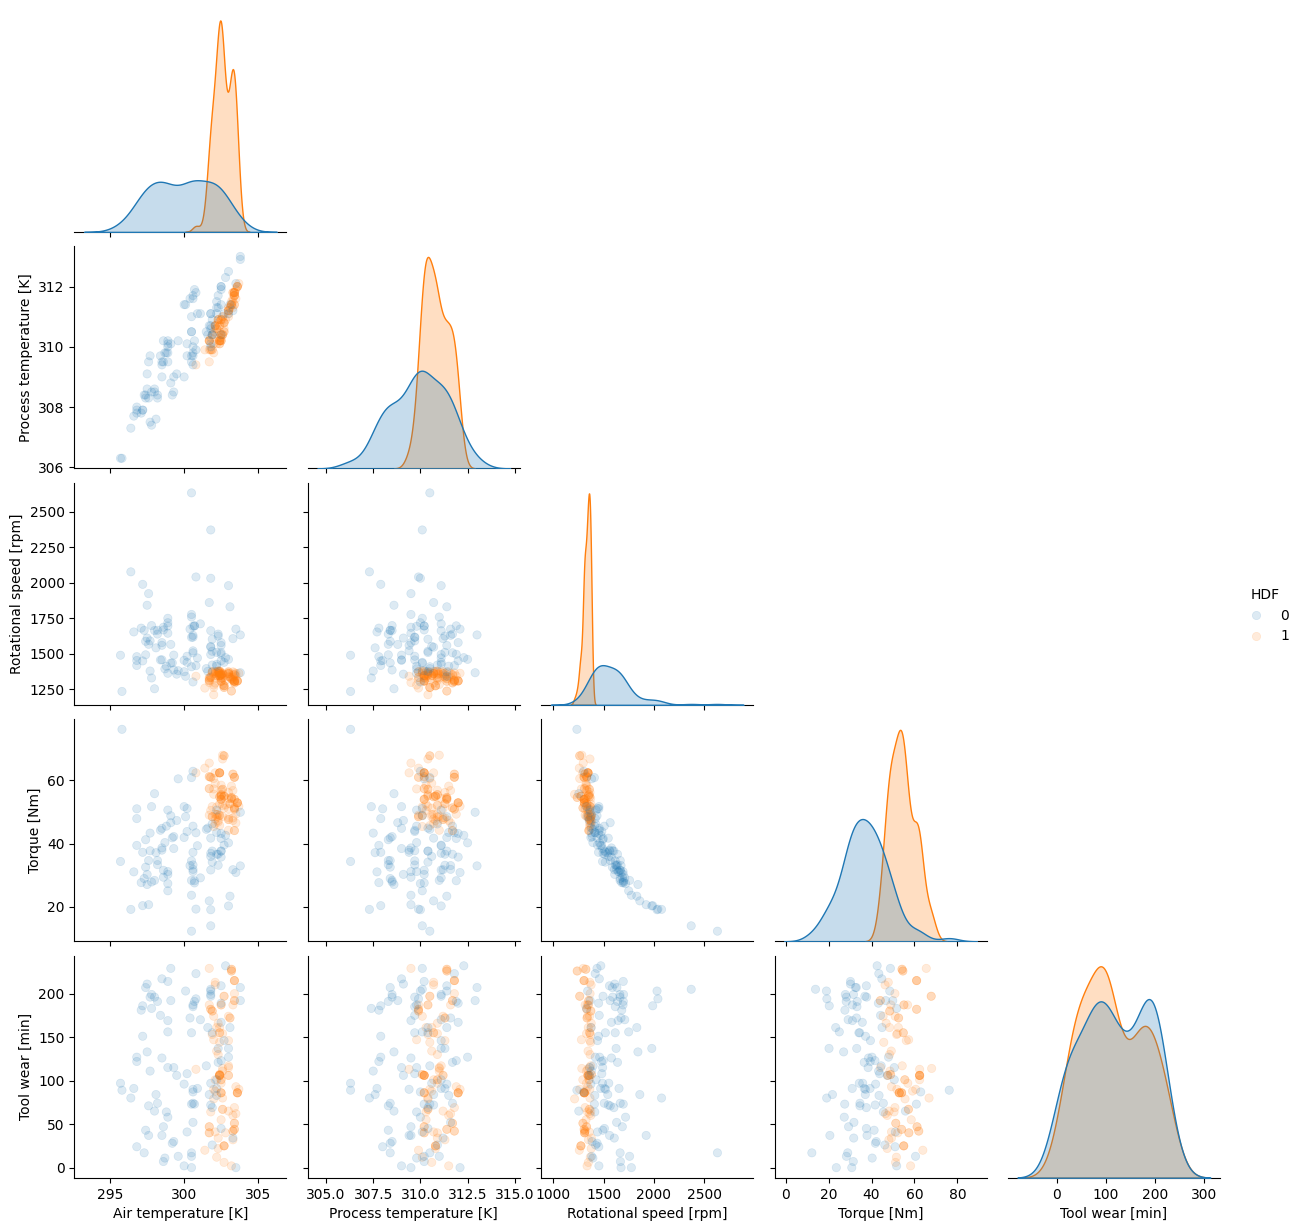

In [ ]:
sns.pairplot(HDF_samples, hue='HDF', vars=vars, plot_kws=plot_kws, corner=True)

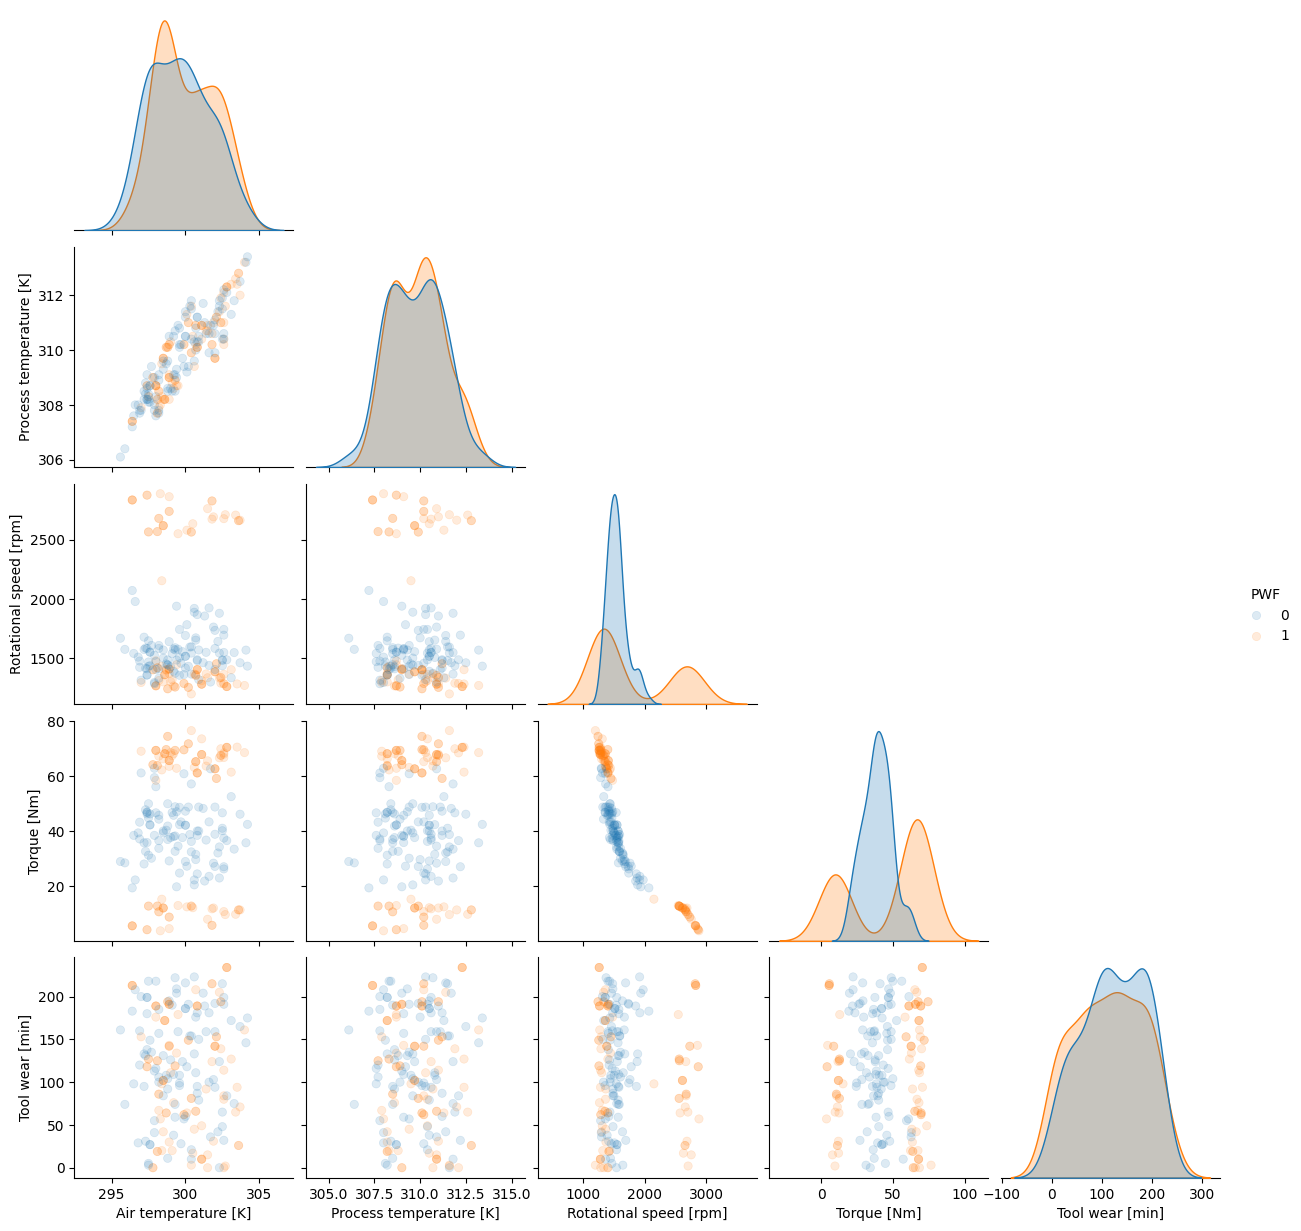

In [ ]:
sns.pairplot(PWF_samples, hue='PWF', vars=vars, plot_kws=plot_kws, corner=True)

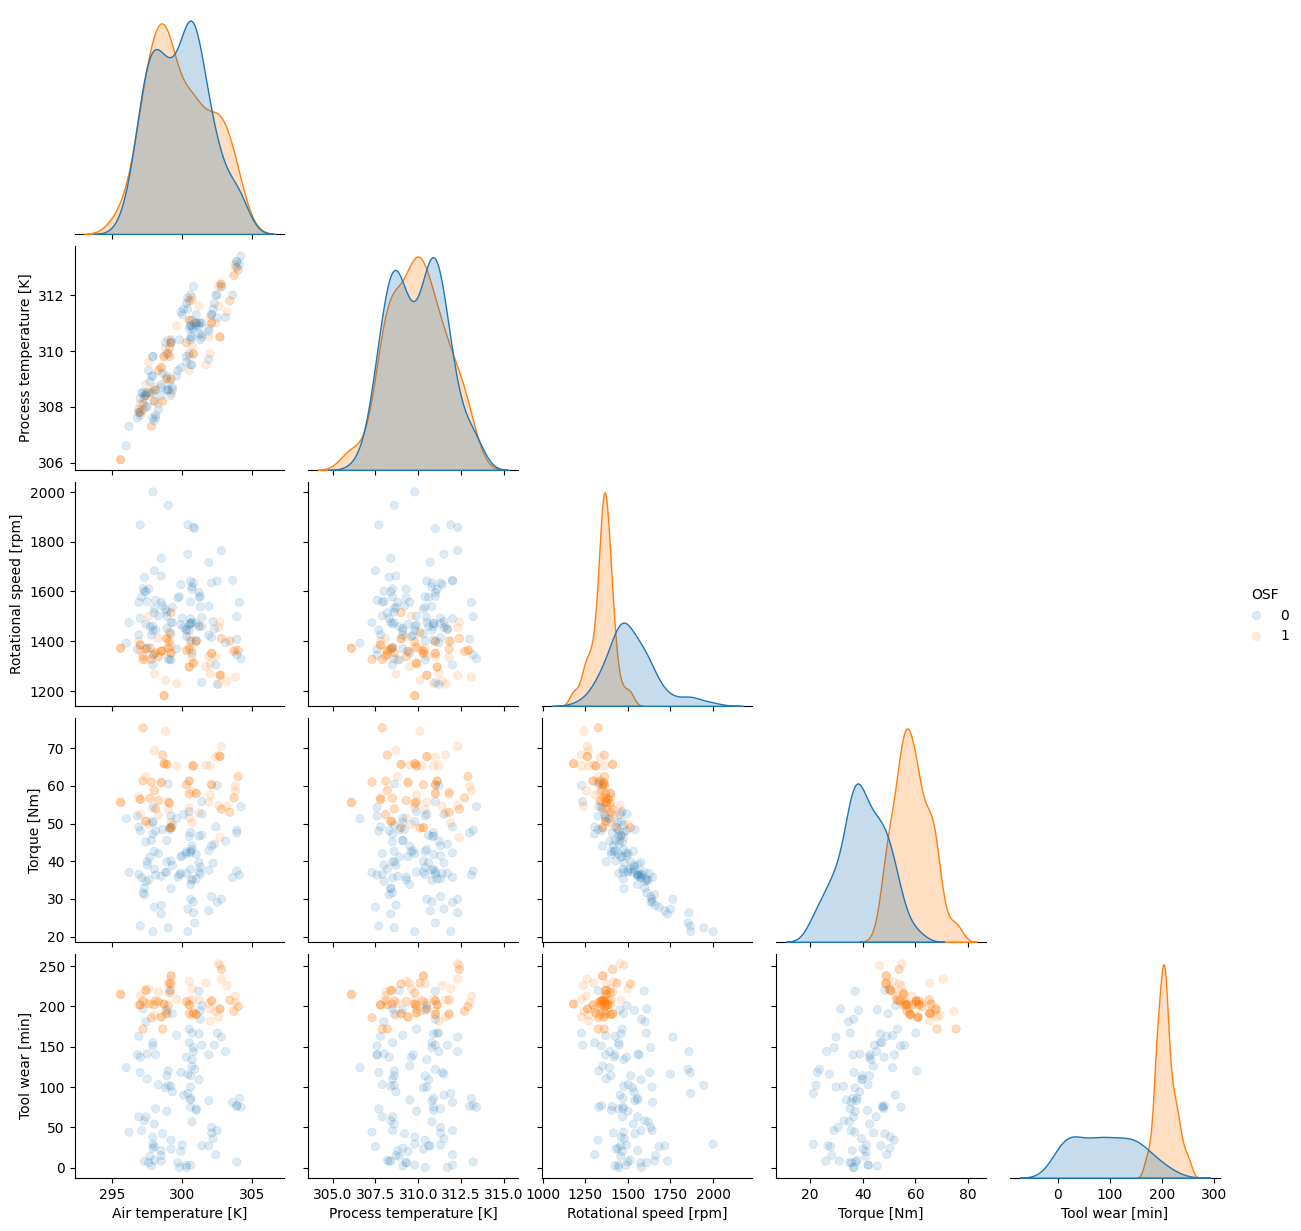

In [ ]:
sns.pairplot(OSF_samples, hue='OSF', vars=vars, plot_kws=plot_kws, corner=True)

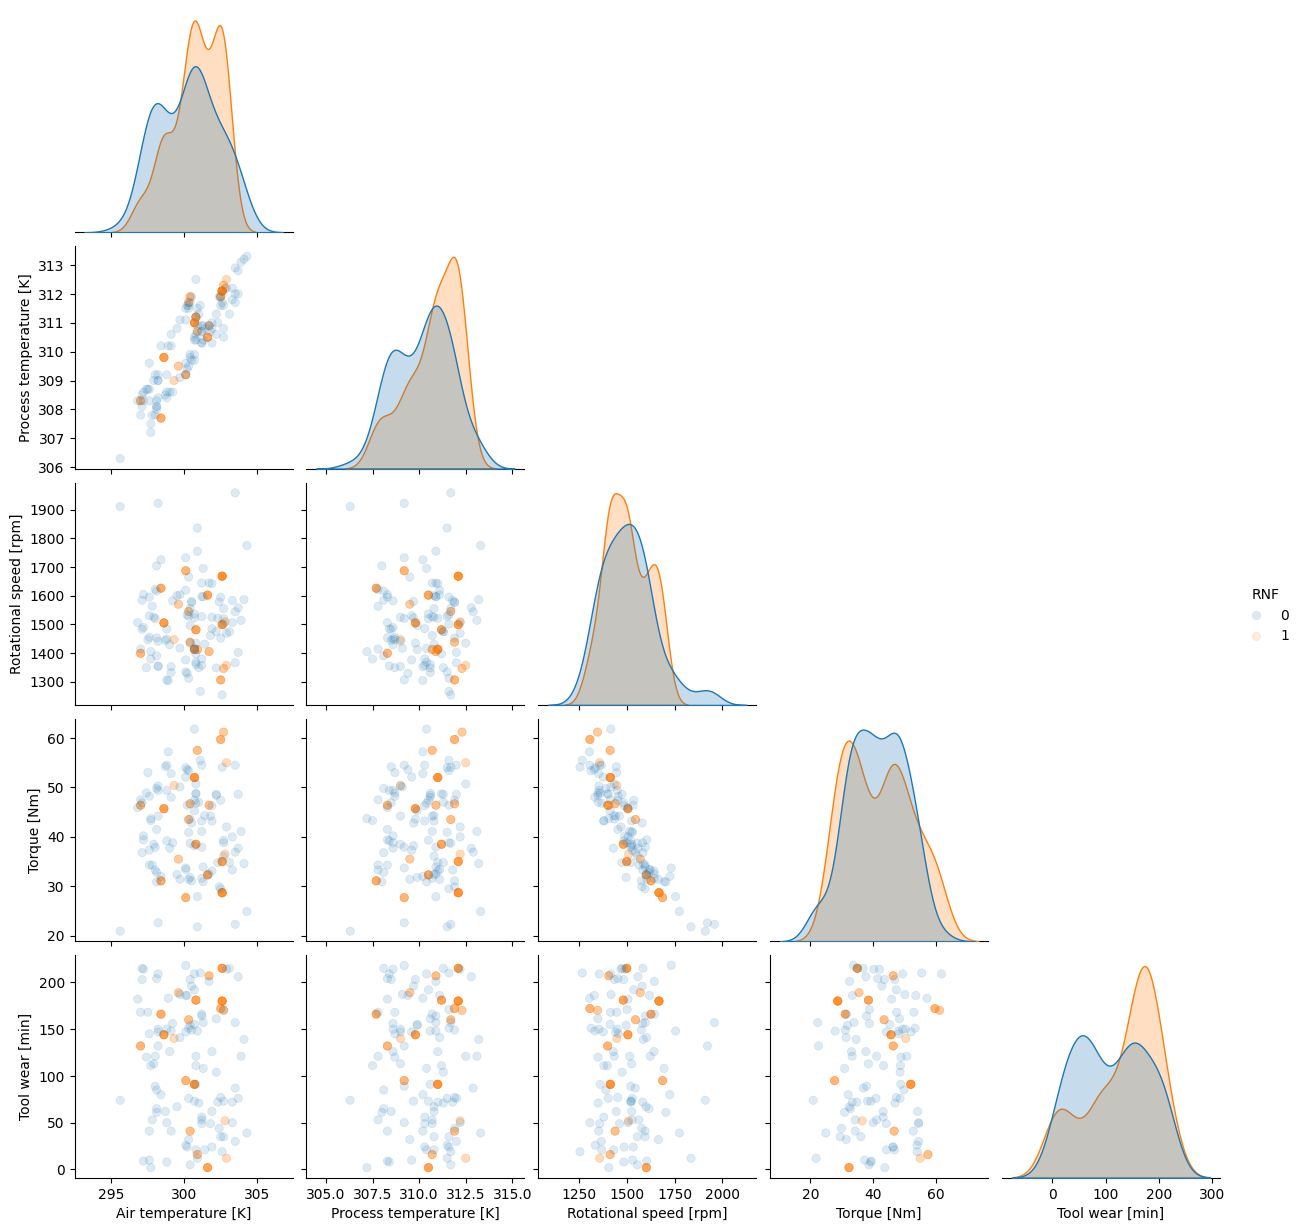

In [ ]:
sns.pairplot(RNF_samples, hue='RNF', vars=vars, plot_kws=plot_kws, corner=True)

In [ ]:
TWF_fail_samples.insert(14,'Failure Mode', 1, allow_duplicates = True)
HDF_fail_samples.insert(14,'Failure Mode', 2, allow_duplicates = True)
PWF_fail_samples.insert(14,'Failure Mode', 3, allow_duplicates = True)
OSF_fail_samples.insert(14,'Failure Mode', 4, allow_duplicates = True)
RNF_fail_samples.insert(14,'Failure Mode', 5, allow_duplicates = True)

In [ ]:
comb_fails = pd.concat([TWF_fail_samples, HDF_fail_samples, PWF_fail_samples, OSF_fail_samples, RNF_fail_samples])
comb_passes = df.loc[df['Machine failure'] == 0].sample(n=500, replace=True)
comb_passes.insert(14,'Failure Mode', 0, allow_duplicates = True)
comb_samples = pd.concat([comb_passes, comb_fails])

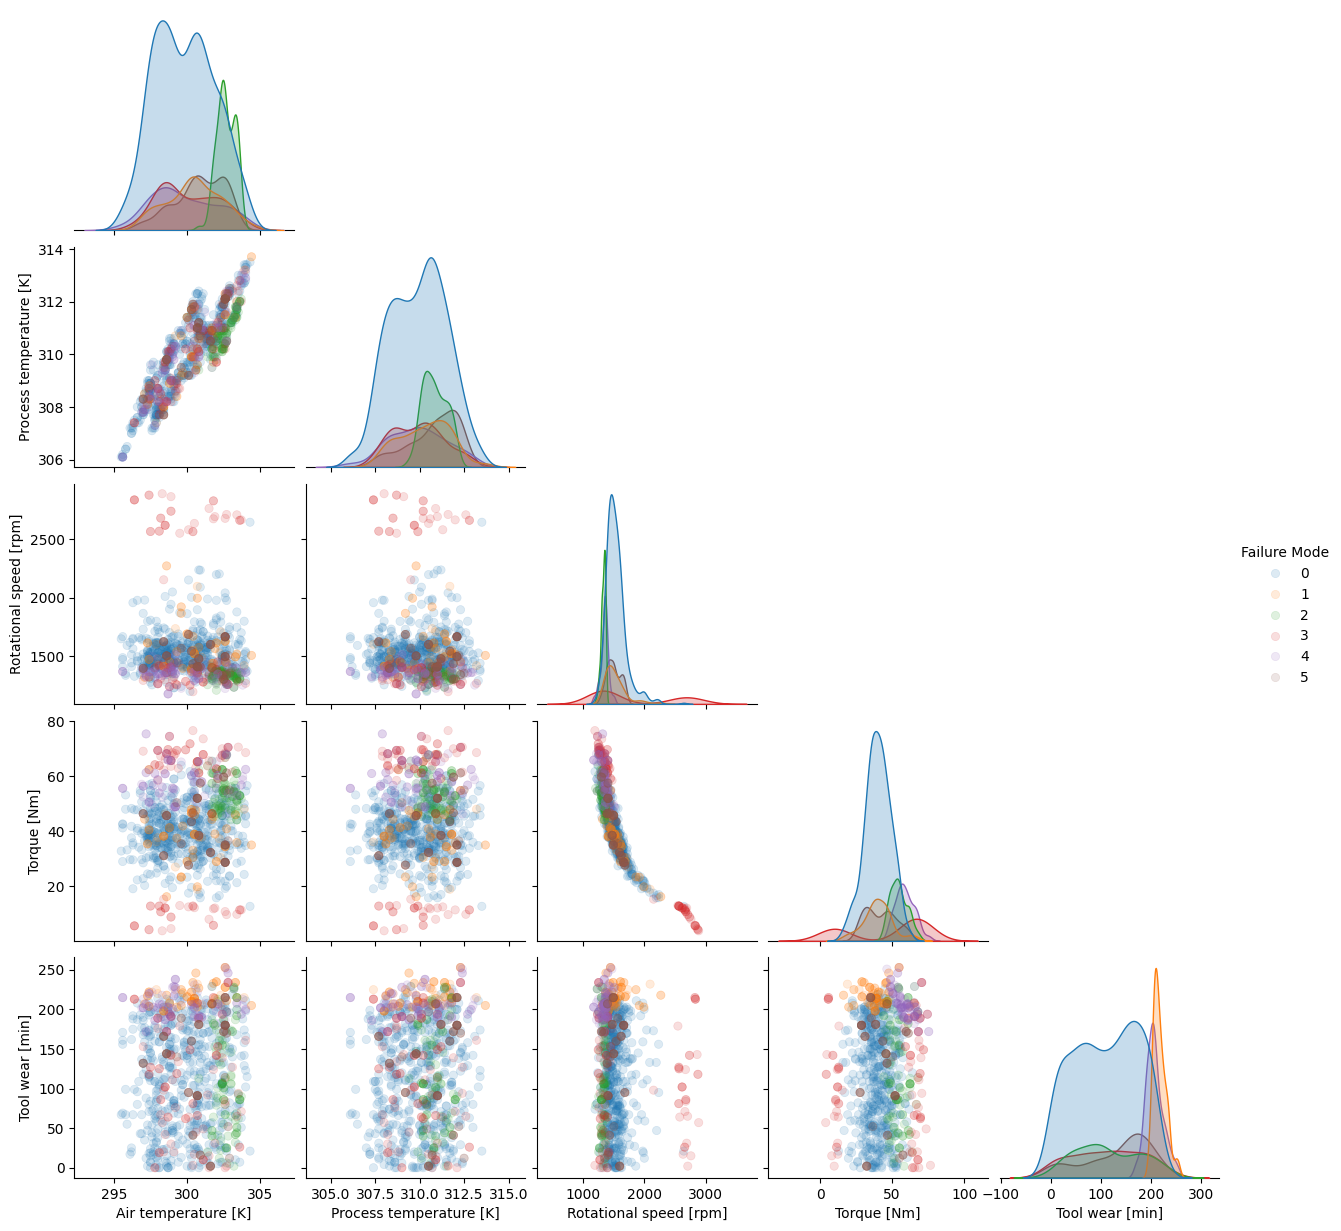

In [ ]:
sns.pairplot(
    comb_samples,
    hue='Failure Mode',
    vars=[
        'Air temperature [K]',
        'Process temperature [K]',
        'Rotational speed [rpm]',
        'Torque [Nm]',
        'Tool wear [min]'],
    plot_kws={'alpha':0.15, 'edgecolor': None},
    palette = "tab10", corner=True)

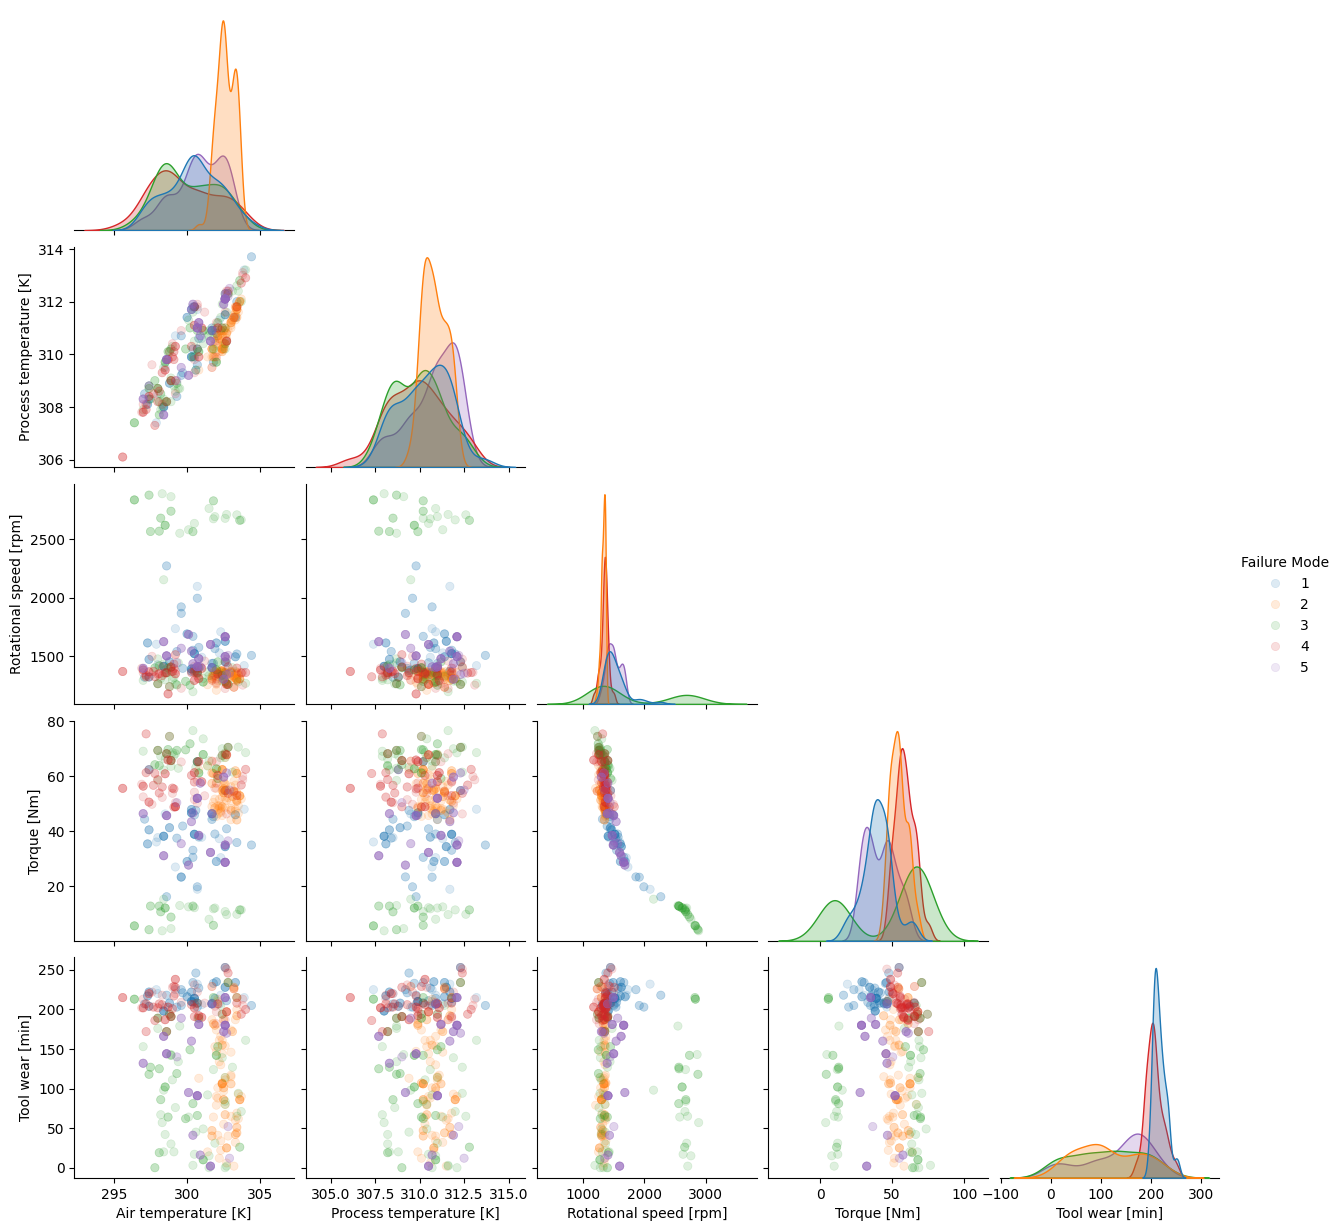

In [ ]:
sns.pairplot(
    comb_fails,
    hue='Failure Mode',
    vars=[
        'Air temperature [K]',
        'Process temperature [K]',
        'Rotational speed [rpm]',
        'Torque [Nm]',
        'Tool wear [min]'],
    plot_kws={'alpha':0.15, 'edgecolor': None},
    palette = "tab10", corner=True)